In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')


In [3]:
df.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [4]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

The datatypes

In [5]:
df.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

- 202 missing values in the column "values"

In [ ]:
# transorming the dtype of "time"
df["time"] = pd.to_datetime(df["time"])

In [6]:
# transformatiing the variable name

# removed appcat string from variable name
# AS14.01 -> 01
df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_12705/2364289440.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_12705/2364289440.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_12705/2364289440.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')


In [23]:
df.describe(include="all")



/var/folders/8q/v2_821r57sl99cmfwhtgcym40000gn/T/ipykernel_53832/2584644881.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
/var/folders/8q/v2_821r57sl99cmfwhtgcym40000gn/T/ipykernel_53832/2584644881.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
/var/folders/8q/v2_821r57sl99cmfwhtgcym40000gn/T/ipykernel_53832/2584644881.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')


/var/folders/8q/v2_821r57sl99cmfwhtgcym40000gn/T/ipykernel_53832/16994401.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
/var/folders/8q/v2_821r57sl99cmfwhtgcym40000gn/T/ipykernel_53832/16994401.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


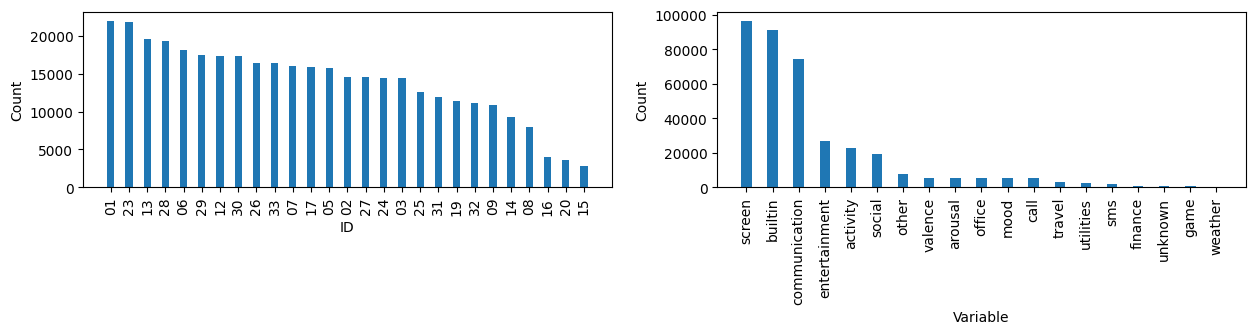

In [24]:
fig,ax = plt.subplots(1,2,figsize=[15,5])


x = df['id'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,1)
plt.bar(cols, vals, width = 0.4) 
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=90)

x = df['variable'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,2)
plt.bar(cols, vals, width = 0.4)
plt.xlabel("Variable")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()


It can be seen that the amount of data collected for various id's is different.
Similarly, the observed

In [16]:
grouped = df.groupby('id')
grouped